In [1]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

In [2]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


In [3]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv' # one sample from regionsurface 

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [4]:
data.loc[data['atlas'].isin(['aparc.DKTatlas']), 'StructName'].unique()
structure_list = list(data.loc[data['atlas'].isin(['aparc.DKTatlas']), 'StructName'].unique())

In [5]:
structure_list

['caudalanteriorcingulate',
 'caudalmiddlefrontal',
 'cuneus',
 'entorhinal',
 'fusiform',
 'inferiorparietal',
 'inferiortemporal',
 'isthmuscingulate',
 'lateraloccipital',
 'lateralorbitofrontal',
 'lingual',
 'medialorbitofrontal',
 'middletemporal',
 'parahippocampal',
 'paracentral',
 'parsopercularis',
 'parsorbitalis',
 'parstriangularis',
 'pericalcarine',
 'postcentral',
 'posteriorcingulate',
 'precentral',
 'precuneus',
 'rostralanteriorcingulate',
 'rostralmiddlefrontal',
 'superiorfrontal',
 'superiorparietal',
 'superiortemporal',
 'supramarginal',
 'transversetemporal',
 'insula']

In [6]:
# prepare for the training & testing

# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

In [7]:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN


In [8]:
# smaller train_data for feature selection

train_data_small = train_data[["participant_id","p_factor"]]

In [9]:
# function for collecting  dataset for specific id, only focuses on atals "aparc.DKTatlas" 

def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    data = data[data['atlas'] == 'aparc.DKTatlas']
    data = data[["subject_id","atlas","hemisphere","StructName","SurfArea","GrayVol"]]

    # Return the loaded data:
    return data

In [10]:
def load_surface_grayvol(participant_id):
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)

    # make the dictionary to hold structure surface area
    structure_surfarea = {}
    structure_grayvol = {}

    for i in structure_list:
        surfaces = data.loc[data['StructName'] == i, 'SurfArea']
        surface = sum(surfaces)
        structure_surfarea[f'{i}_SA'] = surface # SA stands for Surface Area
        grayvols = data.loc[data['StructName'] == i, 'GrayVol']
        grayvol = sum(grayvols)
        structure_grayvol[f'{i}_GV'] = grayvol # GV stands for Gray Volumn

    return structure_surfarea, structure_grayvol

# Feature selection

In [11]:
# Load each structurarea's surface and grayvol for samples in training_dataset (1067)
# the matric would 1067 * 64
print("Loading surface areas and gray matter volumes for each specific structure in list...")

# initialize dictionary to hold all variables:
all_vars = {
    'participant_id': [],
    'p_factor': []
}

for i in structure_list:
    all_vars[f'{i}_SA'] = []
    all_vars[f'{i}_GV'] = []

    
# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(train_data_small))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in train_data_small.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = int(row['participant_id']) # the output is float64
    p_factor = row['p_factor']
    try: 
        surf_area, gray_vol = load_surface_grayvol(participant_id)
    except FileNotFoundError:
        # omit the subjects who are missing the file
        continue
    # Now, append each structure's surface area and gray matter volume to
    # our dataset:
    for i in structure_list:
        all_vars[f'{i}_SA'].append(surf_area[f'{i}_SA'])
        all_vars[f'{i}_GV'].append(gray_vol[f'{i}_GV'])
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars_0 = all_vars[~np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
train_vars_0

Loading surface areas and gray matter volumes for each specific structure in list...


IntProgress(value=0, max=1067)

,participant_id,p_factor,caudalanteriorcingulate_SA,caudalanteriorcingulate_GV,caudalmiddlefrontal_SA,caudalmiddlefrontal_GV,cuneus_SA,cuneus_GV,entorhinal_SA,entorhinal_GV,...,superiorparietal_SA,superiorparietal_GV,superiortemporal_SA,superiortemporal_GV,supramarginal_SA,supramarginal_GV,transversetemporal_SA,transversetemporal_GV,insula_SA,insula_GV
0,1000393599,0.589907,1728,5585,4526,13717,5168,11162,1084,5090,...,8769,22860,11132,40293,7182,22183,910,2494,3828,12772
1,1001970838,-0.659061,1594,4389,4186,12242,3759,8171,695,2826,...,8331,20621,10257,36241,8123,23279,782,2034,4318,14029
2,1007995238,-1.608375,1794,5477,4560,14809,3800,8150,761,3677,...,8188,23300,9580,34938,7432,23968,722,1976,3566,12500
3,1011497669,-1.233807,1954,5906,4768,15392,3783,7839,618,3272,...,9183,24064,9409,34095,8107,24736,712,1818,3931,13559
4,1017092387,-0.923100,1805,5890,4391,14017,4027,8161,647,3420,...,9447,23842,8759,30187,7106,20721,719,2083,3817,12980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,983504031,-1.262053,1561,5115,4218,12849,3702,7416,729,3745,...,7371,18779,9308,34807,6506,19152,796,2281,3576,11889
1056,985910486,-1.233807,1391,3996,3830,12007,3484,7412,637,2564,...,7414,18358,8728,30344,5884,16918,663,1669,3584,11523
1057,986035435,-0.872749,2108,7127,5318,15892,3837,9102,954,3851,...,9733,26956,11612,41688,9244,30763,1048,3569,4207,14283
1058,993394555,-1.420477,1645,4691,5032,15613,4489,10214,1017,4419,...,8942,24124,10615,37493,7782,25682,806,2376,4287,13854


In [24]:
train_vars_0.to_csv('train_importance.tsv', sep='\t', index=False)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [14]:
# importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Importance', ylabel='Feature'>

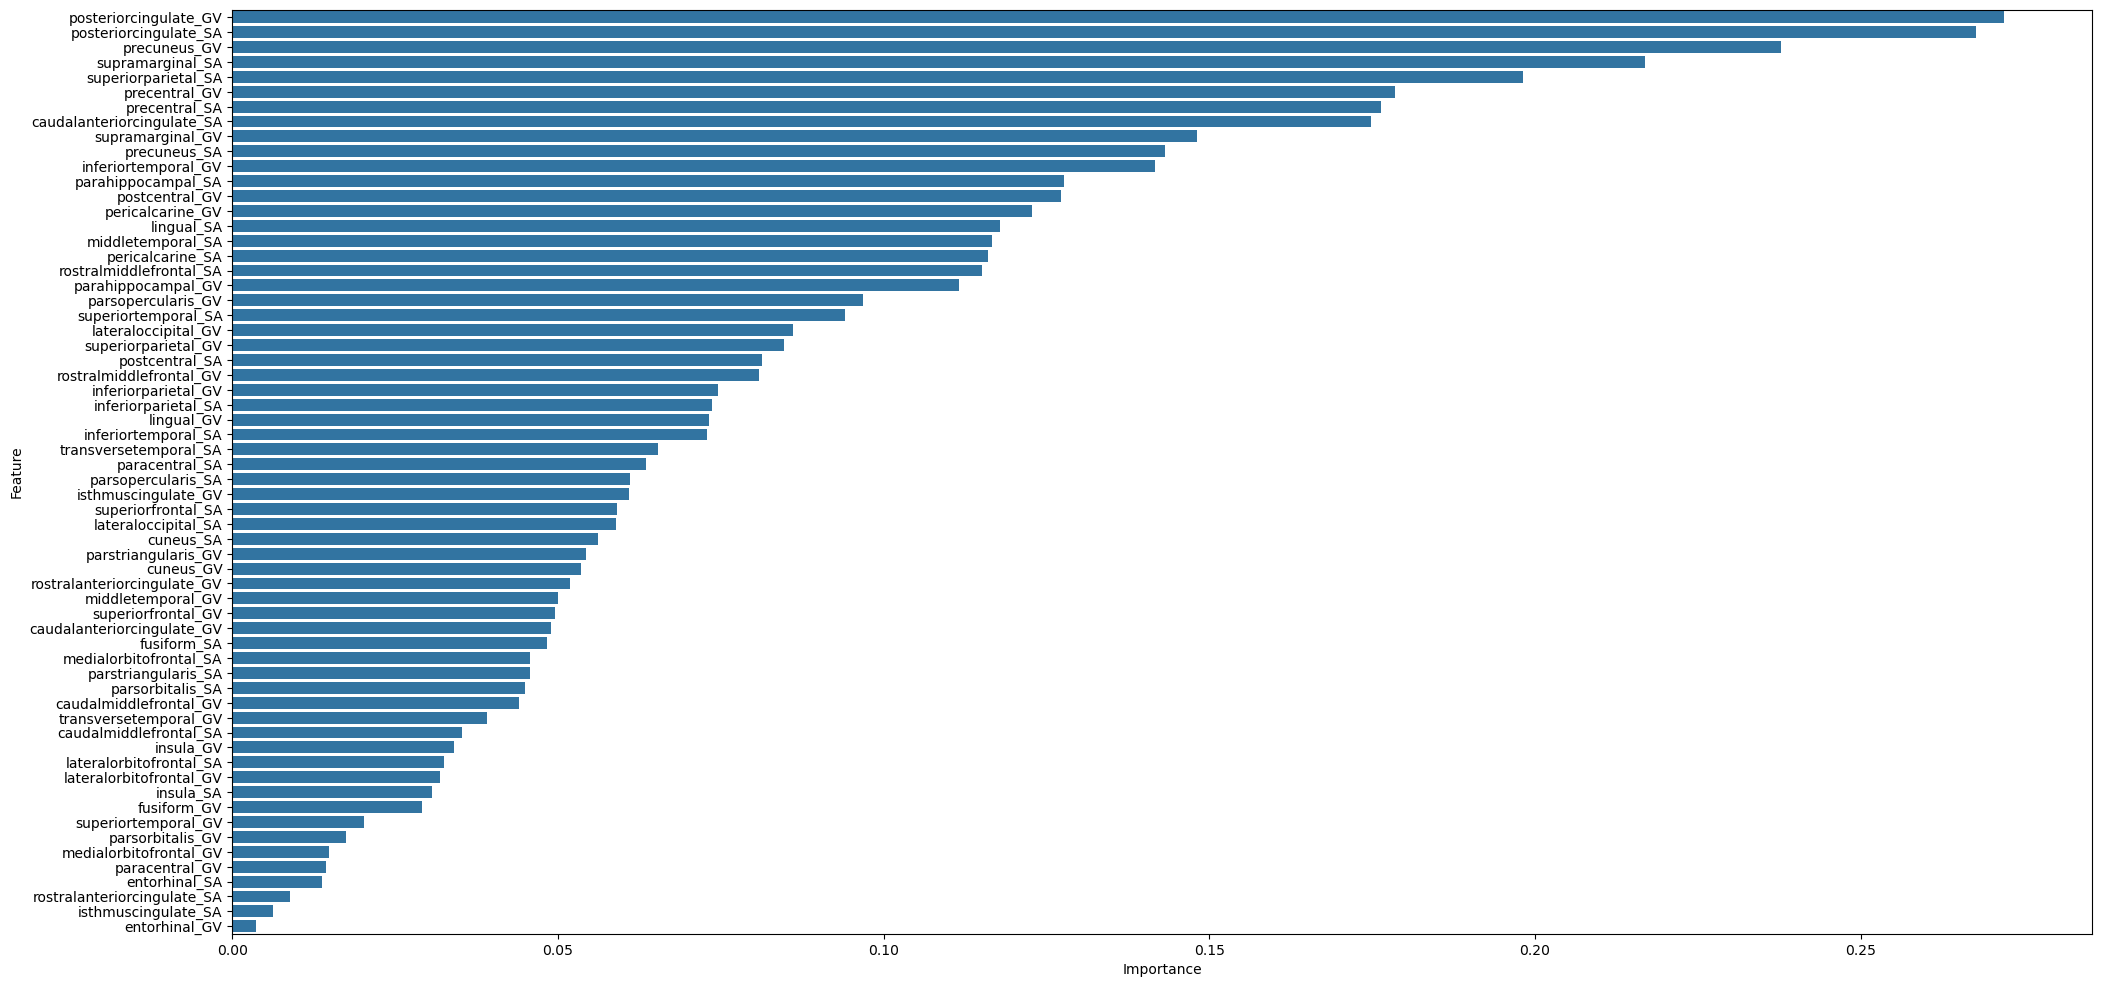

In [15]:
# calculate the feature importance from LR

X = train_vars_0.drop(columns=["p_factor",'participant_id'])
y = train_vars_0["p_factor"]
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X, y)

# Feature importance = absolute value of coefficients
importances = abs(model.named_steps['linearregression'].coef_)

# create a dataframe for feature importance
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(24, 12))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])

In [25]:
feature_importance_df
feature_importance_df.to_csv('feature_importance.tsv', sep='\t', index = False)

In [26]:
test_data_small = test_data[["participant_id"]]

In [27]:
# Load each structurarea's surface and grayvol for samples in training_dataset (1067)
# the matric would 1067 * 64
print("Loading surface areas and gray matter volumes for each specific structure in list...")

# initialize dictionary to hold all variables:
all_vars = {
    'participant_id': []
}

for i in structure_list:
    all_vars[f'{i}_SA'] = []
    all_vars[f'{i}_GV'] = []

    
# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(test_data_small))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in test_data_small.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = int(row['participant_id']) # the output is float64
    try: 
        surf_area, gray_vol = load_surface_grayvol(participant_id)
    except FileNotFoundError:
        # omit the subjects who are missing the file
        continue
    # Now, append each structure's surface area and gray matter volume to
    # our dataset:
    for i in structure_list:
        all_vars[f'{i}_SA'].append(surf_area[f'{i}_SA'])
        all_vars[f'{i}_GV'].append(gray_vol[f'{i}_GV'])
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
test_vars_0 = all_vars

# Display the finished dataframe.
test_vars_0

Loading surface areas and gray matter volumes for each specific structure in list...


IntProgress(value=0, max=534)

,participant_id,caudalanteriorcingulate_SA,caudalanteriorcingulate_GV,caudalmiddlefrontal_SA,caudalmiddlefrontal_GV,cuneus_SA,cuneus_GV,entorhinal_SA,entorhinal_GV,fusiform_SA,...,superiorparietal_SA,superiorparietal_GV,superiortemporal_SA,superiortemporal_GV,supramarginal_SA,supramarginal_GV,transversetemporal_SA,transversetemporal_GV,insula_SA,insula_GV
0,1000881804,1527,4734,3820,11519,4278,8370,714,3272,6063,...,8324,20531,10665,36405,7213,22060,792,2110,3535,11907
1,100527940,2172,6776,5053,16876,4577,9757,806,4105,6061,...,9094,26753,13597,46129,8755,26369,1093,3398,4242,16239
2,1006151876,1389,4287,3922,11087,3488,7123,713,3030,4526,...,6926,16981,8536,30079,6484,17828,622,1795,3175,10120
3,1012530688,2217,7313,7599,18035,4662,12797,689,1967,6412,...,11028,27785,13204,36458,10514,25144,1084,2763,4967,14955
4,1030193285,1843,5545,3782,12323,4403,9796,908,4270,6344,...,8752,24630,10600,40472,7699,24835,862,3105,4200,13872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,969649154,2185,6756,5631,16563,4150,8155,611,2650,6723,...,10594,26782,11355,38651,8842,25495,880,2746,4200,14915
528,970890500,1178,3977,4382,13770,3635,7535,585,2638,4508,...,6676,18150,8208,26880,5474,17576,576,1605,3143,10381
529,975856179,2102,6635,5759,18754,5418,11439,1306,6099,6248,...,11346,31106,11712,40298,8172,24476,947,2867,3910,13715
530,984757368,1750,5191,5439,16216,3894,8102,927,3408,5653,...,7728,19347,11746,36616,8652,23708,963,2620,4641,13728


In [28]:
test_vars_0.to_csv('test_importance.tsv', sep='\t', index=False)

In [29]:
from sklearn.model_selection import train_test_split

# Prediction 

In [30]:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN


In [31]:
for i in all_data.columns:
    print(all_data[i].value_counts())

participant_id
987544292     1
713088600     1
716537879     1
71851847      1
725712542     1
             ..
1017092387    1
1020132225    1
1023701836    1
1025031408    1
1027389114    1
Name: count, Length: 1601, dtype: int64
study
PNC    1601
Name: count, dtype: int64
study_site
PNC1    1601
Name: count, dtype: int64
session_id
PNC1    1601
Name: count, dtype: int64
wave
1    1601
Name: count, dtype: int64
age
18.416667    19
17.666667    18
15.583333    18
18.000000    17
15.166667    17
             ..
8.083333      1
23.000000     1
22.666667     1
22.416667     1
22.250000     1
Name: count, Length: 177, dtype: int64
sex
Female    837
Male      764
Name: count, dtype: int64
race
Black    709
White    704
Other    174
Asian     14
Name: count, dtype: int64
ethnicity
not Hispanic or Latino    1496
Hispanic or Latino         105
Name: count, dtype: int64
bmi
25.05    9
20.59    8
19.48    8
18.30    7
28.34    7
        ..
15.25    1
18.16    1
24.18    1
19.49    1
28.62    1
N

In [32]:
# remove the column "study", "study_site", "session_id", "wave"
# drop "participant_education" as it's highly correlated with "age"
all_data = all_data.drop(columns=["study", "study_site", "session_id", "wave", "participant_education"])
all_data

,participant_id,age,sex,race,ethnicity,bmi,handedness,parent_1_education,parent_2_education,p_factor
0,1000393599,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,Complete primary,Complete secondary,0.589907
1,1001970838,17.833333,Male,Other,Hispanic or Latino,23.98,Right,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,Complete tertiary,Complete primary,-1.608375
3,1011497669,16.666667,Male,White,not Hispanic or Latino,29.68,Right,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...
529,969649154,12.333333,Male,White,not Hispanic or Latino,17.38,Right,Complete tertiary,Complete secondary,NaN
530,970890500,18.166667,Female,White,not Hispanic or Latino,30.89,Right,Complete secondary,Complete secondary,NaN
531,975856179,11.000000,Male,White,not Hispanic or Latino,15.67,Right,Complete primary,Complete secondary,NaN
532,984757368,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,Complete primary,NaN,NaN


In [33]:
all_data_imputed = all_data.copy()

# encode parent education as 4, 3, 2, 1 if its not missing
parent_edu_mapping = {
    "Complete tertiary": 4,
    "Complete secondary": 3,
    "Complete primary": 2,
    "No/incomplete primary": 1
}

all_data_imputed["parent_1_education"] = all_data_imputed["parent_1_education"].map(parent_edu_mapping)
all_data_imputed["parent_2_education"] = all_data_imputed["parent_2_education"].map(parent_edu_mapping)

all_data_imputed["single_parent"] = np.where(
    all_data_imputed[["parent_1_education", "parent_2_education"]].isnull().any(axis=1), 1, 0
)
all_data_imputed["highest_parent_education"] = all_data_imputed[["parent_1_education", "parent_2_education"]].max(axis=1)
all_data_imputed = all_data_imputed.drop(columns=["parent_1_education", "parent_2_education"])
all_data_imputed

,participant_id,age,sex,race,ethnicity,bmi,handedness,p_factor,single_parent,highest_parent_education
0,1000393599,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,0.589907,0,3.0
1,1001970838,17.833333,Male,Other,Hispanic or Latino,23.98,Right,-0.659061,0,4.0
2,1007995238,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,-1.608375,0,4.0
3,1011497669,16.666667,Male,White,not Hispanic or Latino,29.68,Right,-1.233807,0,4.0
4,1017092387,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,-0.923100,0,2.0
...,...,...,...,...,...,...,...,...,...,...
529,969649154,12.333333,Male,White,not Hispanic or Latino,17.38,Right,NaN,0,4.0
530,970890500,18.166667,Female,White,not Hispanic or Latino,30.89,Right,NaN,0,3.0
531,975856179,11.000000,Male,White,not Hispanic or Latino,15.67,Right,NaN,0,3.0
532,984757368,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,NaN,1,2.0


In [34]:
for col in all_data_imputed.columns:
    if col == "p_factor":
        continue
    if all_data_imputed[col].dtype in [np.float64, np.int64]:
        # Continuous data: impute with mean
        mean_value = all_data_imputed[col].mean()
        all_data_imputed.fillna({col:mean_value}, inplace=True)
    else:
        # Categorical data: impute with mode
        mode_value = all_data_imputed[col].mode()[0]
        all_data_imputed.fillna({col:mode_value}, inplace=True)

all_data_imputed

,participant_id,age,sex,race,ethnicity,bmi,handedness,p_factor,single_parent,highest_parent_education
0,1000393599,15.583333,Male,Black,not Hispanic or Latino,22.150000,Right,0.589907,0,3.0
1,1001970838,17.833333,Male,Other,Hispanic or Latino,23.980000,Right,-0.659061,0,4.0
2,1007995238,13.750000,Female,Other,not Hispanic or Latino,23.770000,Right,-1.608375,0,4.0
3,1011497669,16.666667,Male,White,not Hispanic or Latino,29.680000,Right,-1.233807,0,4.0
4,1017092387,18.666667,Female,Black,not Hispanic or Latino,23.240000,Right,-0.923100,0,2.0
...,...,...,...,...,...,...,...,...,...,...
529,969649154,12.333333,Male,White,not Hispanic or Latino,17.380000,Right,NaN,0,4.0
530,970890500,18.166667,Female,White,not Hispanic or Latino,30.890000,Right,NaN,0,3.0
531,975856179,11.000000,Male,White,not Hispanic or Latino,15.670000,Right,NaN,0,3.0
532,984757368,13.416667,Male,Black,not Hispanic or Latino,16.660000,Right,NaN,1,2.0


In [35]:
all_data_imputed.to_csv("clean_demography.tsv",sep='\t', index=False)

In [36]:
# check missing data again (P_factor is allowed)
missing_data_info = all_data_imputed.isnull().sum()
missing_data_info

participant_id                0
age                           0
sex                           0
race                          0
ethnicity                     0
bmi                           0
handedness                    0
p_factor                    534
single_parent                 0
highest_parent_education      0
dtype: int64

In [125]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:

all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN


In [37]:
train_vars_0_ = train_vars_0[["participant_id","posteriorcingulate_GV","posteriorcingulate_SA"]]
test_vars_0_ = test_vars_0[["participant_id","posteriorcingulate_GV","posteriorcingulate_SA"]]
# combine train_vars_0_test with test_vars_
all_vars = pd.concat([train_vars_0_, test_vars_0_])
all_vars

,participant_id,posteriorcingulate_GV,posteriorcingulate_SA
0,1000393599,8609,2778
1,1001970838,6753,2324
2,1007995238,7793,2617
3,1011497669,8341,2873
4,1017092387,7915,2721
...,...,...,...
527,969649154,7730,2715
528,970890500,5229,1724
529,975856179,9330,3179
530,984757368,6793,2322


In [38]:
ready_data = all_data_imputed.copy()

# add news columns "posteriorcingulate_GV" and "posteriorcingulate_SA" from the loaded structure dataframe based on participant_id
structure_data = all_vars.set_index('participant_id')
ready_data = ready_data.join(structure_data[['posteriorcingulate_GV', 'posteriorcingulate_SA']], on='participant_id')
ready_data = ready_data.dropna(subset=['posteriorcingulate_GV', 'posteriorcingulate_SA'])

In [43]:
ready_data.to_csv("ready_data.tsv",sep='\t', index=False)

In [44]:
# break ready_data into train and test sets based on the presence of p_factor
train_data_final = ready_data[~np.isnan(ready_data['p_factor'])]
test_data_final = ready_data[np.isnan(ready_data['p_factor'])]

In [45]:
test_data_final.to_csv("test_data.tsv", sep='\t', index=False )
train_data_final.to_csv("train_data.tsv", sep='\t', index=False )

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

In [47]:
import numpy as np
from sklearn import metrics

In [68]:
def random_forest_model(train_data, test_data):
    # Split dataset
    X_train = train_data.drop(columns=["p_factor", 'participant_id'])
    y_train = train_data["p_factor"]
    X_test = test_data.drop(columns=["p_factor", 'participant_id'], errors='ignore')

    # Define categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", StandardScaler(), numerical_cols),
        ]
    )

    # Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Full Pipeline
    rf_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", rf_model)
    ])
    rf_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = rf_pipeline.predict(X_test)

    # accuracy on training dataset
    y_train_pred = rf_pipeline.predict(X_train)
    r2_score = metrics.r2_score(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    print("R^2 Score on training data:", r2_score)
    print("RMSE on training data:", rmse)

    # return a dataframe
    return pd.DataFrame({"participant_id": test_data['participant_id'], "predicted_p_factor": y_pred})

In [69]:
random_forest_model(train_data_final, test_data_final)

Random Forest Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R^2 Score on training data: 0.8572970006318229
RMSE on training data: 0.3514904402005441


,participant_id,predicted_p_factor
0,1000881804,0.185214
1,100527940,-0.250303
2,1006151876,0.282737
3,1012530688,-0.815065
4,1030193285,-0.456451
...,...,...
529,969649154,-0.934890
530,970890500,-0.128207
531,975856179,-0.398276
532,984757368,-0.358842


In [58]:
pred_f_RF = random_forest_model(train_data_final, test_data_final)

group_name = 'team2_RF'
pred_f_RF.to_csv (f'results/{group_name}.tsv', sep='\t', index=False)

R^2 Score on training data: 0.8572970006318229
RMSE on training data: 0.3514904402005441


In [59]:
QC_fail = ['1502224855', '192039987', '1996891106', '3138342343', '3176914833', '3239156026']
train_data_final_QC = train_data_final[~train_data_final['participant_id'].isin(QC_fail)]

In [61]:
train_data_final_QC

,participant_id,age,sex,race,ethnicity,bmi,handedness,p_factor,single_parent,highest_parent_education,posteriorcingulate_GV,posteriorcingulate_SA
0,1000393599,15.583333,Male,Black,not Hispanic or Latino,22.150000,Right,0.589907,0,3.0,8609.0,2778.0
1,1001970838,17.833333,Male,Other,Hispanic or Latino,23.980000,Right,-0.659061,0,4.0,6753.0,2324.0
2,1007995238,13.750000,Female,Other,not Hispanic or Latino,23.770000,Right,-1.608375,0,4.0,7793.0,2617.0
3,1011497669,16.666667,Male,White,not Hispanic or Latino,29.680000,Right,-1.233807,0,4.0,8341.0,2873.0
4,1017092387,18.666667,Female,Black,not Hispanic or Latino,23.240000,Right,-0.923100,0,2.0,7915.0,2721.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,983504031,16.083333,Male,Black,not Hispanic or Latino,22.810000,Left,-1.262053,0,2.0,6274.0,2198.0
1063,985910486,18.750000,Female,Black,not Hispanic or Latino,24.500000,Right,-1.233807,1,2.0,6208.0,2107.0
1064,986035435,9.916667,Female,White,not Hispanic or Latino,22.746421,Right,-0.872749,0,2.0,9116.0,2857.0
1065,993394555,19.500000,Female,White,not Hispanic or Latino,22.746421,Right,-1.420477,0,3.0,8476.0,2928.0


In [98]:
def random_forest_model_1(train_data, test_data):
    # Split dataset
    X_train = train_data.drop(columns=["p_factor", 'participant_id'])
    y_train = train_data["p_factor"]
    X_test = test_data.drop(columns=["p_factor", 'participant_id'], errors='ignore')

    # Define categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", StandardScaler(), numerical_cols),
        ]
    )

    # Random Forest Model
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth = None,
        random_state=42,
    )

    # Full Pipeline
    rf_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", rf_model)
    ])

    # Cross-Validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='r2')

    print("Cross-Validation R² scores:", np.round(cv_scores, 3))
    print("Mean CV R²:", np.round(cv_scores.mean(), 3))
    print("Std CV R²:", np.round(cv_scores.std(), 3))

    # Fit final model on all training data
    rf_pipeline.fit(X_train, y_train)

    # Training performance (in-sample)
    y_train_pred = rf_pipeline.predict(X_train)
    train_r2 = metrics.r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    print("\nTraining R²:", round(train_r2, 3))
    print("Training RMSE:", round(train_rmse, 3))

    # Compare training vs CV scores
    print("\nOverfitting check:")
    if train_r2 - cv_scores.mean() > 0.1:
        print("Possible overfitting")
    else:
        print("Model generalizes reasonably well.")

    # Predict on test data
    y_pred = rf_pipeline.predict(X_test)

    # Return dataframe
    return pd.DataFrame({
        "participant_id": test_data['participant_id'],
        "predicted_p_factor": y_pred
    })

In [99]:
random_forest_model_1(train_data_final, test_data_final)

Cross-Validation R² scores: [-0.087 -0.025  0.005  0.031  0.041]
Mean CV R²: -0.007
Std CV R²: 0.046

Training R²: 0.857
Training RMSE: 0.351

Overfitting check:
Possible overfitting


,participant_id,predicted_p_factor
0,1000881804,0.185214
1,100527940,-0.250303
2,1006151876,0.282737
3,1012530688,-0.815065
4,1030193285,-0.456451
...,...,...
529,969649154,-0.934890
530,970890500,-0.128207
531,975856179,-0.398276
532,984757368,-0.358842


In [100]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression


In [104]:
# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_data_final.loc[:, ['posteriorcingulate_GV', 'posteriorcingulate_SA', 'bmi', 'age', 'p_factor']].values # Convert to numpy array
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :-1], train_matrix[:, -1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Coefficients:", lreg.coef_)

Linear Regression:
  Intercept: -0.6755390783624453
  Coefficients: [-0.00023862  0.0005112   0.01007537  0.03284942]


In [109]:
# Prepare the training data
X_train = train_data_final[['posteriorcingulate_GV', 'posteriorcingulate_SA', 'bmi', 'age']]
y_train = train_data_final['p_factor']
# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# print(" Intercept:", lr_model.intercept_)
# print(" Coefficients:", lr_model.coef_)


# predict p_factor for test_data_final
X_test = test_data_final[['posteriorcingulate_GV', 'posteriorcingulate_SA', 'bmi', 'age']]
print(lr_model.predict(X_test))

# calculate the r squared value on training data
y_train_pred = lr_model.predict(X_train)
r2_score = metrics.r2_score(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print("R^2 Score on training data:", r2_score)  
print("RMSE on training data:", rmse)

[-0.46056059 -0.87941229 -0.0371429  -1.00024498 -0.45720687 -0.33079276
 -0.45415564 -0.12581535 -1.09296127 -0.30718734 -0.41246239 -0.447075
 -0.47050036 -0.36200192 -0.57323956 -0.23225981 -0.73577478 -0.53295126
 -0.64764182 -0.3318577  -0.70554027 -0.29289287 -0.63274571 -0.45515512
 -0.22437554 -0.18208545 -0.31481832 -0.73893306 -0.29859432 -0.78468203
 -0.28995153 -0.34921899 -0.39615356 -0.74222245 -0.25186384 -0.58838297
 -0.6482454  -0.16291743 -0.66118943 -0.38792477 -0.34909481 -0.20990103
 -0.25525953 -0.49215439 -0.53767945 -0.7869561  -0.31857332 -0.30874276
 -0.38373064 -0.87363835 -0.8771235  -0.07929338 -0.22456561 -0.58584759
 -0.87875511 -0.3050077  -0.33125517 -0.31643934 -0.24652238 -0.42240793
 -0.72743238 -1.0945756  -0.26556957  0.01442077 -0.35131903 -0.67096156
 -0.41873674 -0.14840049 -0.54061593 -0.54531636 -0.46135167 -0.62995182
 -0.88443569 -0.56745014 -0.4245608  -0.4764948  -0.99533703 -0.67187938
 -0.03250675 -0.605486   -0.39124939 -0.26597937 -0.4

In [114]:
# Prepare the training data
# X_train = train_data_final[['posteriorcingulate_GV', 'posteriorcingulate_SA']]
X_train = train_data_final[['posteriorcingulate_GV', 'posteriorcingulate_SA', 'bmi', 'age']]
y_train = train_data_final['p_factor']
# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# print(" Intercept:", lr_model.intercept_)
# print(" Coefficients:", lr_model.coef_)


# predict p_factor for test_data_final
# X_test = test_data_final[['posteriorcingulate_GV', 'posteriorcingulate_SA']]
# make a dataframe for X_test with participant_id and p_factor columns
X_test = test_data_final[['posteriorcingulate_GV', 'posteriorcingulate_SA', 'bmi', 'age']]

# calculate the r squared value on training data
y_train_pred = lr_model.predict(X_train)
r2_score = metrics.r2_score(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print("R^2 Score on training data:", r2_score)
print("RMSE on training data:", rmse)

LR = pd.DataFrame({
        "participant_id": test_data_final['participant_id'],
        "predicted_p_factor": lr_model.predict(X_test)
    })

LR

R^2 Score on training data: 0.06767489927877668
RMSE on training data: 0.8984225734931096


,participant_id,predicted_p_factor
0,1000881804,-0.460561
1,100527940,-0.879412
2,1006151876,-0.037143
3,1012530688,-1.000245
4,1030193285,-0.457207
...,...,...
529,969649154,-0.551890
530,970890500,-0.133967
531,975856179,-0.757508
532,984757368,-0.500874


In [117]:
LR.to_csv("team2_LR.tsv", sep = '\t', index = False)